# Ejemplo de clasificación binaria mediante regresión logística
*Ignacio Díaz Blanco, 2018. Universidad de Oviedo*

Ejemplo de clasificación binaria mediante regresión logística. La versión del algoritmo utilizado está basada en la del proyecto de Github NapkinML https://github.com/eriklindernoren/NapkinML

En cuanto al proceso de minimización de la función de coste de regresión logística, puede consultarse material intesante en http://www.hlt.utdallas.edu/~vgogate/ml/2017s/lectures/lr-nb-lec6.pdf

Suponemos modelos paramétricos sigmoidales de probabilidad condicionada para Y=0 e Y=1
$$
P(Y=0|X)=\frac{e^{-\sum_i w_i\cdot X_i}}{1+e^{-\sum_i w_i\cdot X_i}}\\
P(Y=1|X)=\frac{1}{1+e^{-\sum_i w_i\cdot X_i}} 
$$

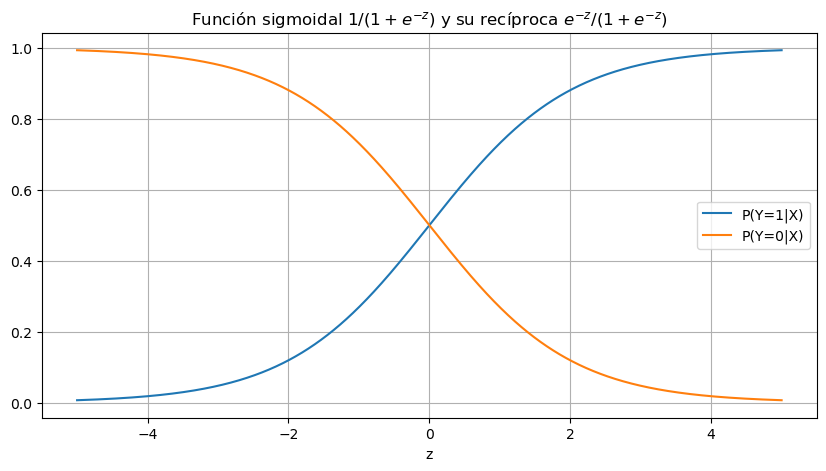

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

%matplotlib inline


# Definición de la función sigmoidal
def sigmoid(x):
    return 1/(1+np.exp(-x))


# Dibujamos la función sigmoidal y su recíproca
x = np.linspace(-5,5,1000)
y1 = sigmoid(x)
y0 = 1-sigmoid(x)
plt.figure(figsize=(10,5))
plt.plot(x,y1,x,y0)
plt.grid(True)
plt.title(u'Función sigmoidal $1/(1+e^{-z})$ y su recíproca $e^{-z}/(1+e^{-z})$')
plt.xlabel('z')
plt.legend(['P(Y=1|X)','P(Y=0|X)'])

Estos modelos son un caso particular de la función *softmax* (ver wikipedia https://es.wikipedia.org/wiki/Función_SoftMax )
Con estos modelos, la regla de clasificación para asignar la clase $Y=0$ sería:

$$
1< \frac{P(Y=0|X)}{P(Y=1|X)} \qquad \leftrightarrow\qquad 0 < -\sum_i w_i X_i
$$

Supongamos que tenemos $L$ observaciones $X_1, X_2, …, X_l, …, X_L$
La verosimilitud de esas observaciones de acuerdo con el modelo paramétrico $P(Y|X,w)$ será

$$
\prod_l P(Y_l|X_l,w) 
$$

y lo que buscaremos será hallar los parámetros o pesos $w$ que maximizan la verosimilitud de las observaciones 
$$
w  \leftarrow \arg\max_w \prod_l P(Y_l|X_l,w) 
$$

Tomando logaritmos, los productos se convierten en sumas

$$
w  \leftarrow \arg\max_w \sum_l \ln P(Y_l|X_l,w) \qquad {\rm o\, bien} \qquad w \leftarrow \arg\max_w L(w)
$$

donde $L(w)$ es logaritmo de la función de verosimilitud (*log-likelihood*)

En el sumatorio anterior, $Y_l$ solo toma dos valores: $\{0, 1\}$. Esto nos permite separar los sumandos con $Y_l=1$ de los sumandos con $Y_l=0$

$$
L(w) = \sum_l \left\{ Y_l \ln P(Y_l=1|X_l,w) + (1-Y_l)\ln P(Y_l=0|X_l,w) \right\}
$$

Si agrupamos los términos con el factor común $Y_l$, queda

$$
L(w) = \sum_l \left\{ Y_l \ln \frac{P(Y_l=1|X_l,w)}{P(Y_l=0|X_l,w)} + \ln P(Y_l=0|X_l,w) \right\}
$$

sustituyendo $P(Y_l=1 |X_l,w)$ o $P(Y_l=0 |X_l,w)$ por sus expresiones (ver arriba)

$$
L(w) = \sum_l \left\{ {Y_l (\sum^n_i w_i X_{li})} + \ln \frac{e^{-\sum_i w_i X_{li}}}{1+e^{-\sum_i w_i X_{li}}} \right\}
$$

derivando respecto a los pesos, obtenemos el gradiente
$$
\frac{\partial L(w)}{\partial w_i} = \sum_l X_{li}({Y_l - P(Y_l=1|X_l,w)})
$$

Esto nos permite obtener una regla de aprendizaje:

$$
w_i \leftarrow w_i  + \nu \sum_l X_{li} (Y_l - P(Y_l=1|X_l,w))
$$

In [2]:

# Clase para iteración de regresión logística
# ¡¡La solución es muy simple!!

class LogisticRegression():
    def fit(self, X, y, n_iter=4000, lr=0.01):
        self.w = np.random.rand(X.shape[1])
        for _ in range(n_iter):
            self.w -= lr * (self.predict(X) - y).dot(X)
    def predict(self, X):
        return sigmoid(X.dot(self.w))



# Ejemplo de aplicación

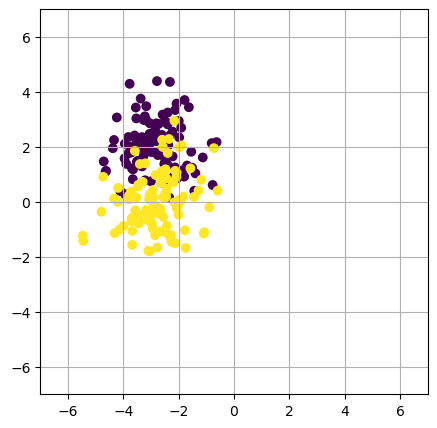

In [3]:
# Definimos dos nubes de puntos en R2
X = np.vstack((
        np.random.randn(100,2) + np.array([-3,2])[np.newaxis,:],
        np.random.randn(100,2) + np.array([-3,0])[np.newaxis,:]
         ))

# añadimos columna de unos (término de bias)
X = np.hstack((X,np.ones((200,1))))

# Definimos sus clases (targets)
y = np.hstack((0*np.ones(100),1*np.ones(100)))

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], s=50, c=y, linewidths=0)
plt.axis([-7,7,-7,7])
plt.grid(True)

<Figure size 640x480 with 0 Axes>

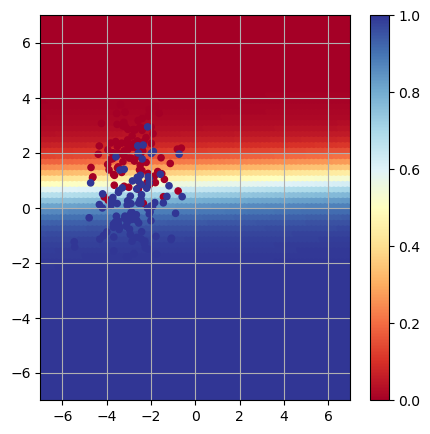

In [4]:
# Instanciamos nuestra clase LogisticTegression
a = LogisticRegression()

# ejecutamos el método fit para entrenar
a.fit(X,y,lr=0.0001)

# Definimos datos de test (retícula en R2)
[xi,yi] = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
Xt = np.vstack((xi.ravel(),yi.ravel())).T
Xt = np.hstack((Xt,np.ones((10000,1))))

# ejecutamos el método predict() sobre los datos de test
yt = a.predict(Xt)


# mostramos los resultados de la clasificación
plt.ion()
plt.set_cmap(cm.RdYlBu)
plt.figure(figsize=(5,5))
plt.clf()
plt.scatter(Xt[:,0],Xt[:,1],c=yt,linewidths=0)
plt.scatter(X[:,0],X[:,1],c=y,s=20)
plt.colorbar()
plt.axis([-7,7,-7,7])
plt.grid(True)
plt.show()

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Ejemplo - clasificación binaria regresión logística</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.
        